In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_pt_brazil_normalized_emoji_merged.csv',
                sep=',',
                converters={
                     "normalized_text_stemm_emoji": lambda x: x.strip("[]").replace("'","").split(", ")
                 })
df = df[['created_at', 'normalized_text_stemm_emoji', 'sentiment']]
df.head()

,created_at,normalized_text_stemm_emoji,sentiment
0,2021-07-04 22:17:21,"[após, fic, silênci, cpi, carl, wizard, retorn...",Positivo
1,2019-11-30 14:35:33,"[lamb, fon, ouv, list, doenç, transmiss, oral,...",Negativo
2,2022-01-11 12:12:28,"[defin, vacin, tip, subst, bactér, introduz, c...",Negativo
3,2019-11-19 14:52:06,"[iphon, segur, contr, ]",Positivo
4,2021-12-28 23:09:10,"[estrag, complet, tud, ]",Negativo


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
df['input'] = df['normalized_text_stemm_emoji'].apply(lambda x: ' '.join([word for word in x]))

vectorizer = CountVectorizer(lowercase=False, min_df=50)
X = vectorizer.fit_transform(df['input'].values)

print(vectorizer.get_feature_names())
print(X.toarray())

['18h', '20h', '24h', '48h', 'abaix', 'abal', 'abandon', 'abenço', 'abert', 'abord', 'abort', 'abr', 'abraç', 'abril', 'absolut', 'absurd', 'abus', 'acab', 'academ', 'acas', 'account', 'aceit', 'aceler', 'acerc', 'acert', 'acess', 'ach', 'acid', 'acim', 'acion', 'acomet', 'acompanh', 'aconselh', 'acontec', 'acord', 'acostum', 'acr', 'acredit', 'acumul', 'acus', 'adapt', 'adequ', 'adeu', 'adi', 'adiant', 'adic', 'adiv', 'adm', 'administr', 'admir', 'admit', 'adoec', 'adolesc', 'ador', 'adot', 'adquir', 'adult', 'advers', 'advog', 'aeroport', 'afast', 'afet', 'aff', 'afim', 'afinal', 'afirm', 'afric', 'aft', 'age', 'agend', 'agent', 'agind', 'agir', 'aglom', 'aglomer', 'agor', 'agost', 'agr', 'agradec', 'agradeç', 'agrav', 'agress', 'agu', 'aguard', 'agud', 'aguent', 'agulh', 'agênc', 'ai', 'aid', 'ain', 'aind', 'ajud', 'ala', 'alago', 'alarm', 'alastr', 'albert', 'alcanç', 'alcool', 'alcoól', 'alde', 'aleatóri', 'aleg', 'alegr', 'alem', 'alemanh', 'alenc', 'alerg', 'alert', 'alessandr',

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
Y = list(df['sentiment'].replace(['Positivo','Negativo','Neutro'],[1,-1,0]))

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [37]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [38]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred = rf.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.797875


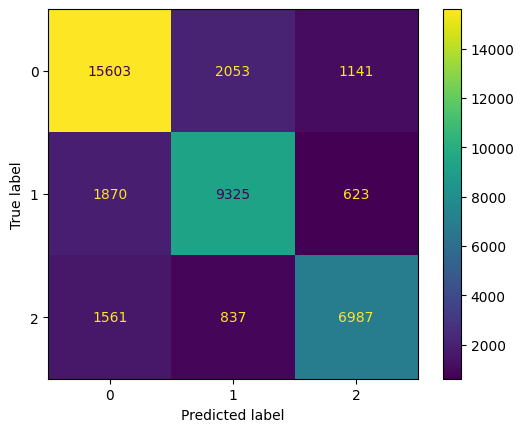

In [41]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.82      0.83      0.82     18797
           0       0.76      0.79      0.78     11818
           1       0.80      0.74      0.77      9385

    accuracy                           0.80     40000
   macro avg       0.79      0.79      0.79     40000
weighted avg       0.80      0.80      0.80     40000



In [47]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [53]:
rf.get_params()
# {'bootstrap': True,
#  'ccp_alpha': 0.0,
#  'class_weight': None,
#  'criterion': 'gini',
#  'max_depth': None,
#  'max_features': 'auto',
#  'max_leaf_nodes': None,
#  'max_samples': None,
#  'min_impurity_decrease': 0.0,
#  'min_impurity_split': None,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'min_weight_fraction_leaf': 0.0,
#  'n_estimators': 100,
#  'n_jobs': None,
#  'oob_score': False,
#  'random_state': None,
#  'verbose': 0,
#  'warm_start': False}

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [65]:
param_grid = {
    'n_estimators': [100, 125, 150],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['auto', None],
    'max_depth': [None],
    'max_leaf_nodes': [None],
}

In [66]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid,
                          n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

/usr/local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:756: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  UserWarning,
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "/usr/local/lib/python3.7/site-packages/joblib/paralle

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/sklearn/utils/fixes.py", line 222, in __call__
    return self.function(*args, **kwargs)
  File "/usr/local/lib/python3.7/

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/sklearn/utils/fixes.py", line 222, in __call__
    return self.function(*args, **kwargs)
  File "/usr/local/lib/python3.7/

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/sklearn/utils/fixes.py", line 222, in __call__
    return self.function(*args, **kwargs)
  File "/usr/local/lib/python3.7/

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "/usr/local/lib/python3.7/site-packages/joblib/parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/sklearn/utils/fixes.py", line 222, in __call__
    return self.function(*args, **kwargs)
  File "/usr/local/lib/python3.7/

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.78778125 0.7882125  0.78860625 0.76676875 0.76651875 0.76635625
 0.7892375  0.789025   0.79006875 0.7709     0.770725   0.7714875
        nan        nan        nan        nan        nan        nan]
  category=UserWarning


RandomForestClassifier(criterion='entropy', n_estimators=150)


In [68]:
grid_search.best_params_
# {'max_depth': 9,
#  'max_features': None,
#  'max_leaf_nodes': None,
#  'n_estimators': 50}

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'n_estimators': 150}

In [ ]:
# rf = RandomForestClassifier(max_depth=None, max_features='auto',max_leaf_nodes= None, n_estimators= 150,criterion='entropy')

In [70]:
rf = RandomForestClassifier(max_depth=None, max_features='auto',max_leaf_nodes= None, n_estimators= 150,criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [71]:
y_pred = rf.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8013


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.83      0.82      0.83     18797
           0       0.76      0.80      0.78     11818
           1       0.80      0.76      0.78      9385

    accuracy                           0.80     40000
   macro avg       0.80      0.79      0.79     40000
weighted avg       0.80      0.80      0.80     40000

